In [ ]:
"""
This program will build a k neareast neighbor classifier using 
the cancer data
"""

In [1]:
def confusion_matrix(predict, actual):
  total = len(predict)
  t = 0
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  for i in range(len(predict)):
    if predict[i] == actual[i]:
      t += 1
    if predict[i] == 'M' and actual[i] == 'M':
      tp += 1
    if predict[i] == 'B' and actual[i] == 'M':
      fn += 1
    if predict[i] == 'M' and actual[i] == 'B':
      fp += 1
    if predict[i] == 'B' and actual[i] == 'B':
      tn += 1
  
  print("Now printing out info of confusion matrix")
  print("Accuracy of the tree is {:.4f}".format(t/total))
  print("Precision of the tree is {:.4f}".format(tp/(tp+fp)))
  print("Recall/sensitivity of the tree is {:.4f}".format(tp/(tp+fn)))
  print("Specificity of the tree is {:.4f}".format(tn/(tn+fp)))

Import and split the data for Cancer

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split # splitting the data

#read the data using pandas packages
df = pd.read_csv('DecTreeAssign1.dat')

df.head()
df.shape #(569,31)

train, test = train_test_split(df, test_size = 0.2)  # test size can also be manipulated
X_train = train.iloc[:,1:]
Y_train = train.iloc[:,0]
X_test = test.iloc[:,1:]
Y_test = test.iloc[:,0]
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values
print("X_train has shape of {}".format(X_train.shape))  #(455,30)
print("Y_train has shape of {}".format(Y_train.shape))  #(455,)
print("X_test has shape of {}".format(X_test.shape))   #(114,30)
print("Y_test has shape of {}".format(Y_test.shape))  #(114,)


X_train has shape of (455, 30)
Y_train has shape of (455,)
X_test has shape of (114, 30)
Y_test has shape of (114,)


Import and split the data for Health

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split # splitting the data

#read the data using pandas packages
df = pd.read_csv('fetal_health.csv')

df.head()
df.shape 

train, test = train_test_split(df, test_size = 0.2)  # test size can also be manipulated
X_train = train.iloc[:,:-1]
Y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
Y_test = test.iloc[:,-1]
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values
print("X_train has shape of {}".format(X_train.shape))  #(1700,21)
print("Y_train has shape of {}".format(Y_train.shape))  #(1700,)
print("X_test has shape of {}".format(X_test.shape))   #(426,21)
print("Y_test has shape of {}".format(Y_test.shape))  #(426,)

FileNotFoundError: ignored

Building and training the model

In [15]:
from sklearn.neighbors import KNeighborsClassifier
num_neighbors = 5
# all other hyperparameters are using default value
knn_model = KNeighborsClassifier(n_neighbors = num_neighbors)   
knn_model.fit(X_train, Y_train)
predicted_knn = knn_model.predict(X_test)

print("Accuracy of the model is {}".format(knn_model.score(X_test, Y_test)))
print()
confusion_matrix(predicted_knn, Y_test)

Accuracy of the model is 0.9298245614035088

Now printing out info of confusion matrix
Accuracy of the tree is 0.9298
Precision of the tree is 0.9091
Recall/sensitivity of the tree is 0.9091
Specificity of the tree is 0.9429


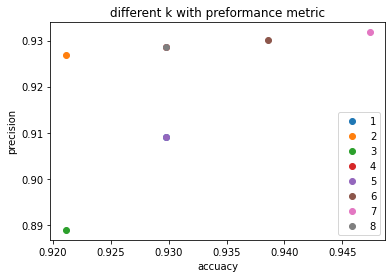

In [33]:
# scatter plot for various k
import matplotlib.pyplot as plt
k = [1, 2, 3, 4, 5, 6, 7, 8]
accuracy = [0.9298, 0.9211, 0.9211, 0.9298, 0.9298, 0.9386, 0.9474, 0.9298]
precision = [0.9091, 0.9268, 0.8889, 0.9286, 0.9091, 0.9302, 0.9318, 0.9286]
for num in k:
  plt.scatter(accuracy[num-1], precision[num-1], label = k[num-1])
plt.legend()
plt.xlabel("accuacy")
plt.ylabel("precision")
plt.title("different k with preformance metric")
plt.show()